# Data Literacy
#### University of Tübingen, Winter Term 2021/22
## Exercise Sheet 6
&copy; 2021 Prof. Dr. Jakob Macke & Marius Hobbhahn

This sheet is **due on Monday, December 6, 2021 at 10am sharp (i.e. before the start of the lecture).**

---

## EXAMple

1. Since derivation keeps $r_n$ untouched and (17):

$$
\nabla_{\omega} E(\omega) = \omega^\intercal 2 \left( \sum_n r_n x_n x_n^\intercal \right) - 2 \sum_n r_n t_n x_n^\intercal \overset{!}{=} 0
\Rightarrow \omega_{wMSE} = \left( \sum_n r_n x_n x_n^\intercal \right)^{-1} \sum_n r_n t_n x_n
$$

2. We assume, that there are measurements $(x_n, t_n)$ that occured $c_n$ times. The weighting for one measurement $(x_n, t_n)$ should be $r_n = c_n / \sum_i c_i$.

3. $y(x_n, \omega, \sigma_n) = \omega^\intercal x_n + \sigma_n$ with solution

$$
\omega_{wMSE noise} = \left( \sum_n r_n x_n x_n^\intercal \right)^{-1} \sum_n r_n (t_n - \sigma_n) x_n
$$

Measurements with higher noise should have smaller weighting. Therefore a weighting could be:
$$
r_n = (1 - \sigma_n^2) / (N - \sum_{n=1}^N \sigma_n^2) \newline
$$
You could also use an softmax with $1 - \sigma^2$ as input.

---

## Theory Question

$$
\log p(\omega | D, \alpha, \beta) = C + \log p(D | \omega, \beta) + \log p(\omega | \alpha) \\
    = C + \log p(D | \omega, \beta) + \sum_{i=1}^M \log(\sqrt{\frac{\alpha}{2 \pi}} \exp (- \frac{\alpha}{2} \omega_i^2)) \\
    = C^\prime + \log p(D | \omega, \beta) - \frac{1}{2} \omega^\intercal \alpha \omega \\
    = C^{\prime\prime} - \frac{\beta}{2} || \omega^\intercal x - t ||^2  - \frac{1}{2} \omega^\intercal \alpha \omega \\
    = C^{\prime\prime} - \frac{1}{2} \omega^\intercal \alpha \omega - \frac{\beta}{2} \left( \omega^\intercal x^\intercal x \omega - 2 t^\intercal x \omega + t^\intercal t \right) \\
    = C^{\prime\prime} - \frac{1}{2}  \omega^\intercal \underbrace{(\alpha + \beta x^\intercal x)}_{= \Sigma^{-1}} \omega - \frac{\beta}{2} \left(- 2 t^\intercal x \omega + t^\intercal t \right) \\
    = C^{\prime\prime\prime} - \frac{1}{2}  \omega^\intercal \underbrace{(\alpha + \beta x^\intercal x)}_{= \Sigma^{-1}} \omega + \beta t^\intercal x \omega \\
    = C^{\prime\prime\prime\prime} - \frac{1}{2} \left( \omega^\intercal \Sigma^{-1} \omega - 2 \beta \frac{\Sigma}{\Sigma} t^\intercal x \omega + \underbrace{\beta \Sigma t^\intercal \Sigma^{-1} \beta \Sigma x t}_{= \mu^\intercal \Sigma^{-1} \mu \text{ is const.}} \right) \\
    = C^{\prime\prime\prime\prime} - \frac{1}{2} \left( \omega - \mu \right)^\intercal \Sigma^{-1} \left( \omega - \mu \right)
$$
If you take the exponent $p(\omega | D)$ is a multivariate Gaussian distribution.

---

## Regression

Much of Machine Learning that is currently done in the real world uses simple regression approaches such as linear or logistic regression. It is therefore important that we understand how these methods works, and what can go wrong when trying them out. This week we will focus on implementing linear regression and nonlinear regresssion on our own in simple settings, next week we will focus on logistic regression and regularization. 

### Part I: One-dimensional linear regression

In this part we will do linear (Gaussian) regression on a simple one-dimensional toy problem. 
We use simulated weight and height data (in reality, the relationship between the two is much more messy than in our simulated data).


**Tasks:**

1. Define a function that computes the linear regression weights given data X and labels y (don't use a pre-made package such as scikit-learn)
2. Import the weight-height.csv data
3. Apply linear regression with weight as X and height as y (Hint: if your function goes through the origin, you might still be missing something)
4. Plot the result (label the axis with correct units)
5. Finally, now use a linear regression package (e.g. scikit-learn) and fit it to your data, and check that you get the same result. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### define our linear regression function

def linear_regression(X, y):
    ...

# TODO

In [2]:
### load data

# TODO

In [1]:
### predict and plot

# TODO

In [4]:
### compare to sklearn

# TODO

### Part II: One-dimensional nonlinear regression

We are now looking at a trend that is clearly not linear. However, we can use a transformation of the data to look at it in the log space and do a linear regression there. See https://ourworldindata.org/co2-emissions for the data. 

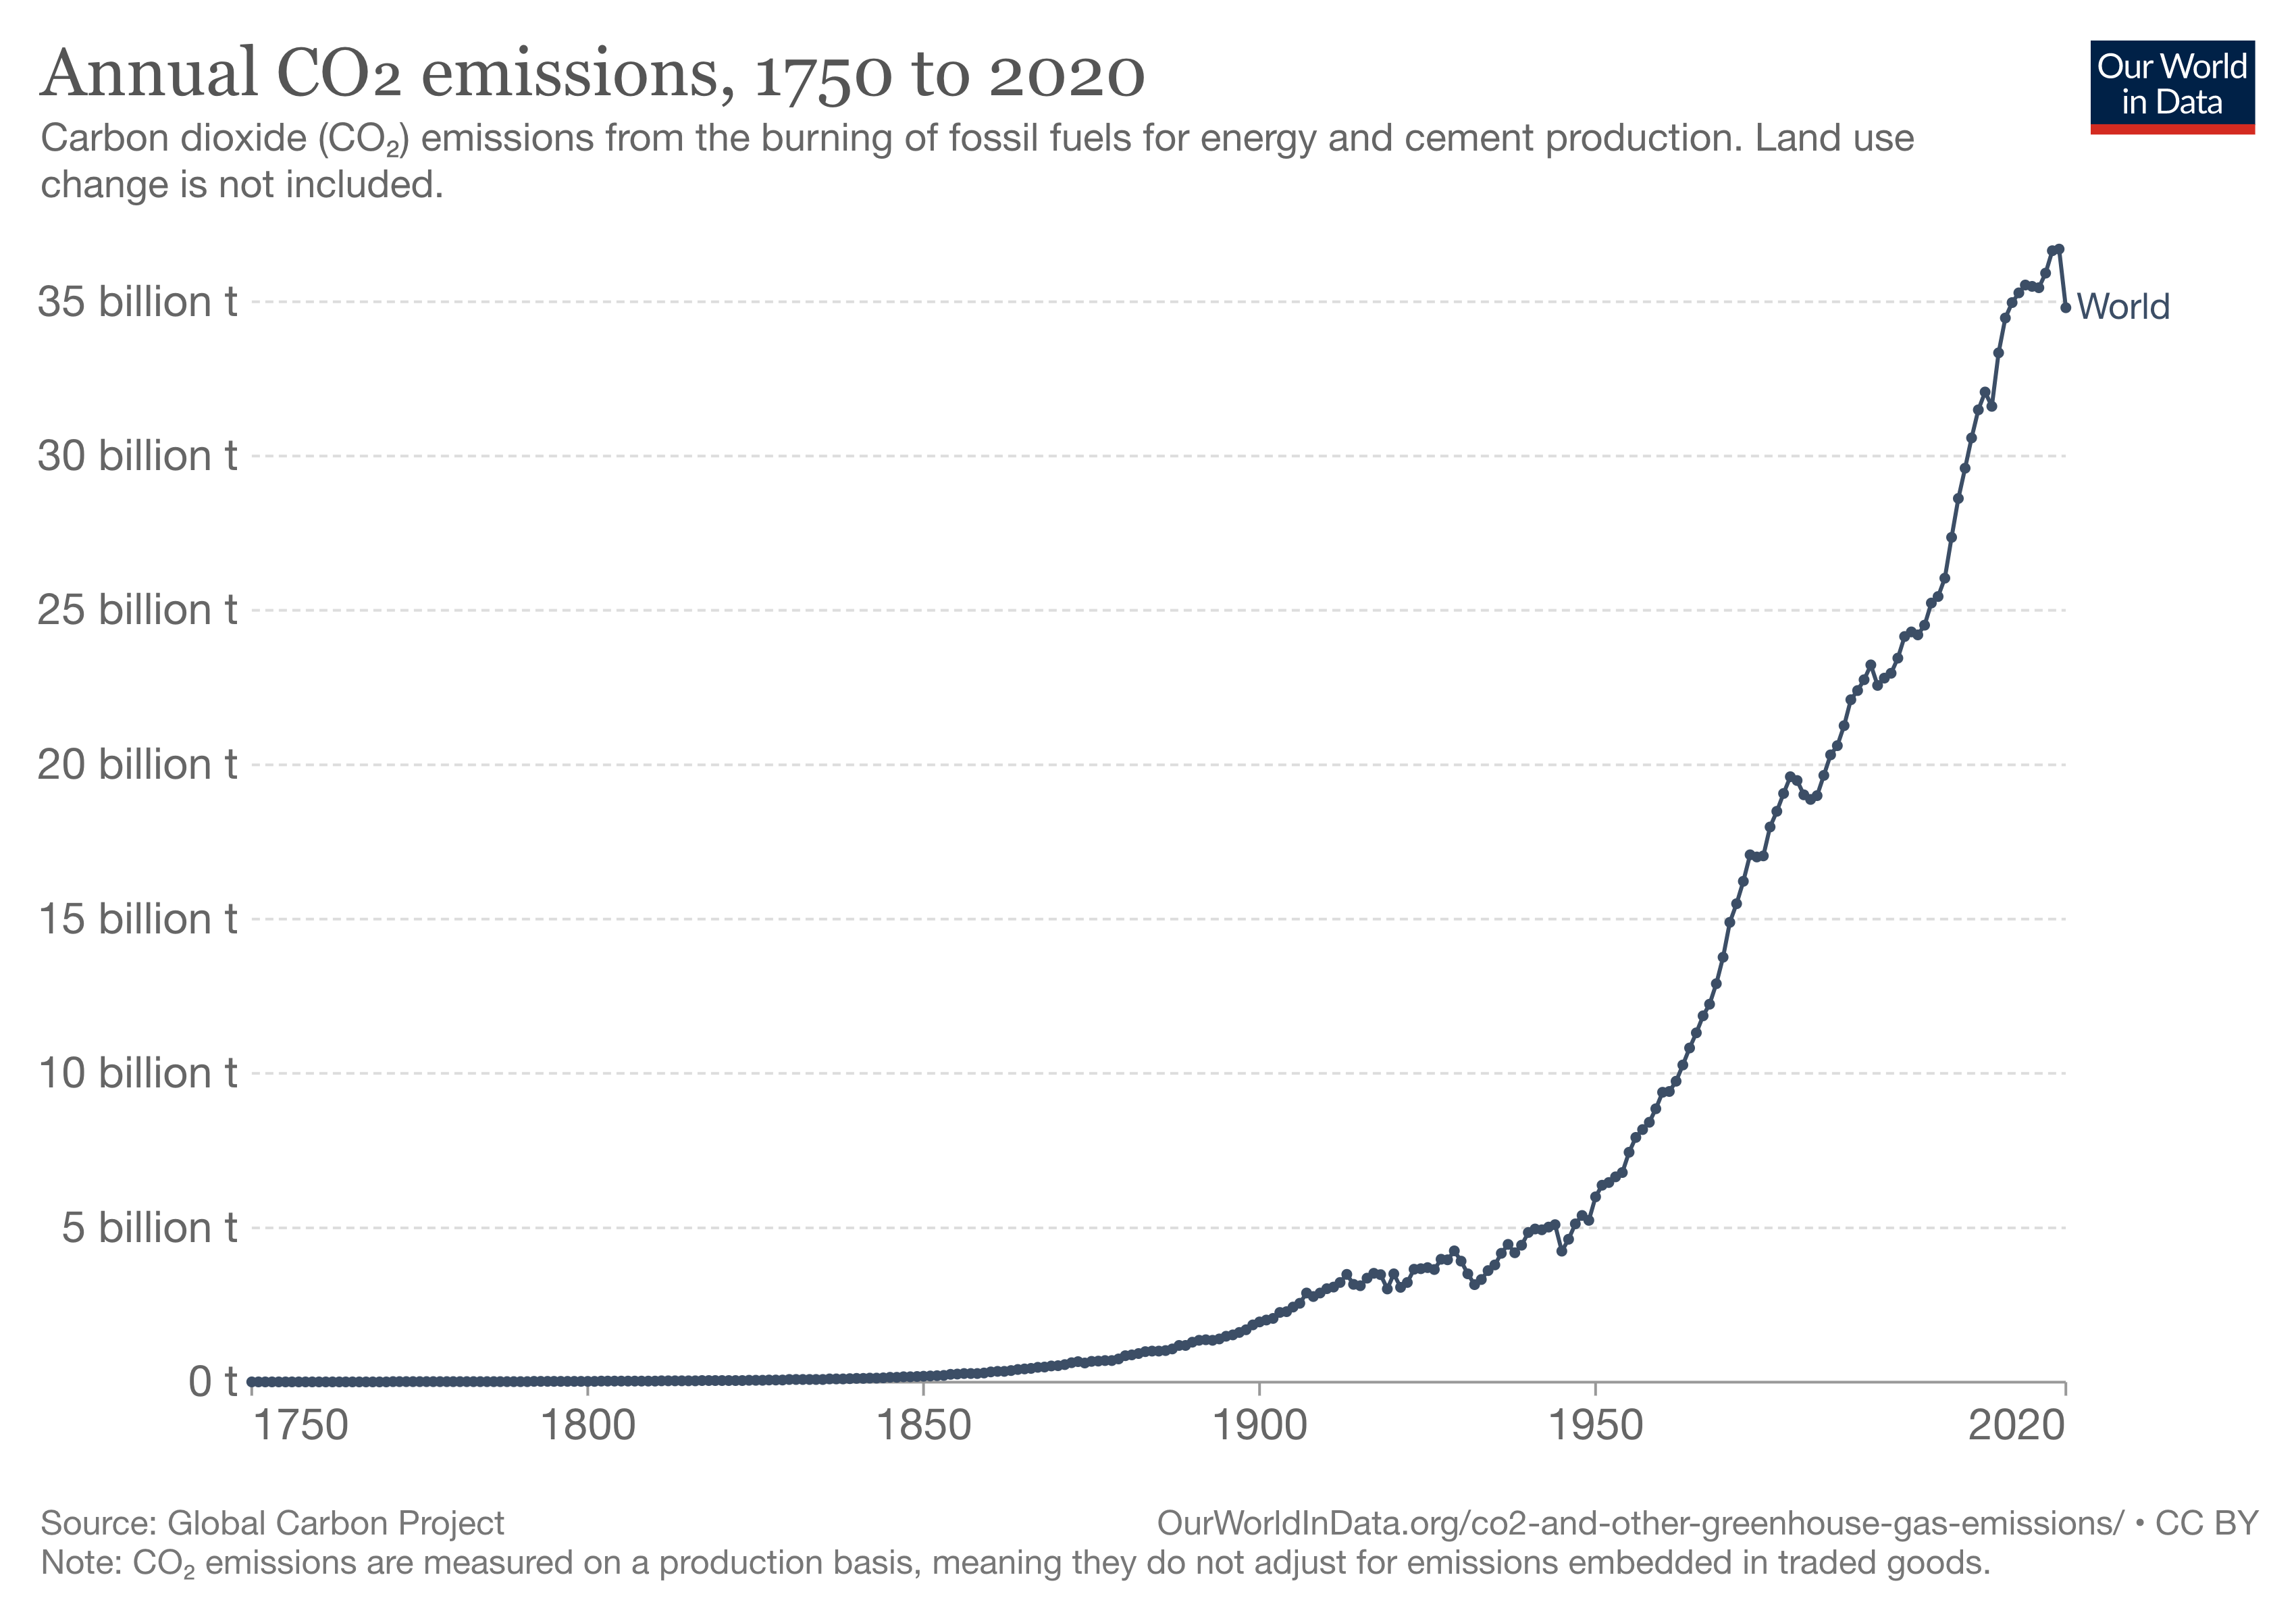

In [6]:
from IPython.display import Image
Image(filename='figures/co2_world.png') 

**Tasks:**

1. Import the co2.csv data 
2. Apply the log transformation 
3. Do the same as in Part I
4. Transform the predicted function back and plot the results

In [8]:
### load dataset

# TODO

In [9]:
### make linear regression in log space

# TODO

In [2]:
### predict and plot

# TODO

### Part III: a different log regression

The simple logarithmic transform that we used above assumes a linear function in log-space. However, there are other ways in which we can modify a linear function that uses an implicit logarithmic function. 

In this exercise we use the model $f(x) = a * \exp(b * x) + c$ to fit our data.

You are given the code for the new model and a loss function.

**Tasks**:
1. Use scipy.optimize to fit the parameters a, b, and c to the data. We found that the "Nelder-Mead" method of optimization works well in this case. 
2. Try different initializations for the parameters. We found that the resulting functions look very different depending on the initialization. 
3. Plot your fit and compare it with the original data and the fit from the previous exercise.

In [11]:
def exp_regression(x, a, b, c):
    return(a * np.exp(b * x) + c)

def l2_norm(y, y_hat):
    return(np.sqrt(np.sum((y - y_hat)**2)))

In [12]:
import scipy.optimize

In [13]:
### use scipy.optimize to get parameter values for a,b and c

# TODO

In [3]:
### predict and plot

# TODO

### High-level questions:

We have now fitted two different functions with implicit logarithmic transformations. Please answer the following questions:
1. What are the different assumptions these two models make, i.e. in which ways and why do the induced functions differ?
2. Which of them make more sense in your opinion?
3. Do you think either of the models yields a good prediction for the next 10, 20 or 50 years of CO2 development? Why or why not?